In [26]:
def tikz_convert(ax,
         clean = False, mktex = False, path = "", filename = "", caption = None):
    
    num = len(ax.get_axes()) 
    if num != 1:
        num = 2
    
    if filename == "":
        import uuid
        filename = str(uuid.uuid4()) + ".tex"
        
    if path == "":
        path = "../Obsidian"
    
    if mktex:
    
        import tikzplotlib as tikz

        def tikzplotlib_fix_ncols(obj):
            """
            workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
            """
            if hasattr(obj, "_ncols"):
                obj._ncol = obj._ncols
            for child in obj.get_children():
                tikzplotlib_fix_ncols(child)

        tikzplotlib_fix_ncols(ax)
        if clean:
            ax = tikz.clean_figure(ax)
        
        tikz.save(f"{path}/{filename}", 
                axis_width = f"\\textwidth/{num} - 2cm",
                axis_height = "9cm")
    if caption:
        print(f"""
```text
\\begin{{figure}}[H]
\\centering
[[{filename}]]
\\caption{{{caption}}}
\\end{{figure}}
```""")
    else:
        print(f"""
```text
\\begin{{figure}}[H]
\\centering
[[{filename}]]
\\end{{figure}}
```""")
    
    return None


def format_dataframe(df):
    
    def auto_format(number):
        if isinstance(number, (int, float)):
            if abs(number) >= 1000 or (abs(number) < 0.001 and number != 0):
                return f"{number:.3e}"  # Экспоненциальный формат
            else:
                return f"{number:.3f}"  # Обычный формат
        return str(number)  # Если это не число, оставляем как есть
    
    return df.applymap(auto_format)

,C,A
0,0.000006,0.11285
1,0.000012,0.22382
2,0.000018,0.35364
3,0.000024,0.46479
4,0.000030,0.58915


2.228345216406531e-05
1.526685489778769e-05

```text
\begin{figure}[H]
\centering
[[градуировка метилоранж.tex]]
\end{figure}
```
|    |    C, М |       A |
|----|---------|---------|
|  0 | 6e-06   | 0.11285 |
|  1 | 1.2e-05 | 0.22382 |
|  2 | 1.8e-05 | 0.35364 |
|  3 | 2.4e-05 | 0.46479 |
|  4 | 3e-05   | 0.58915 |


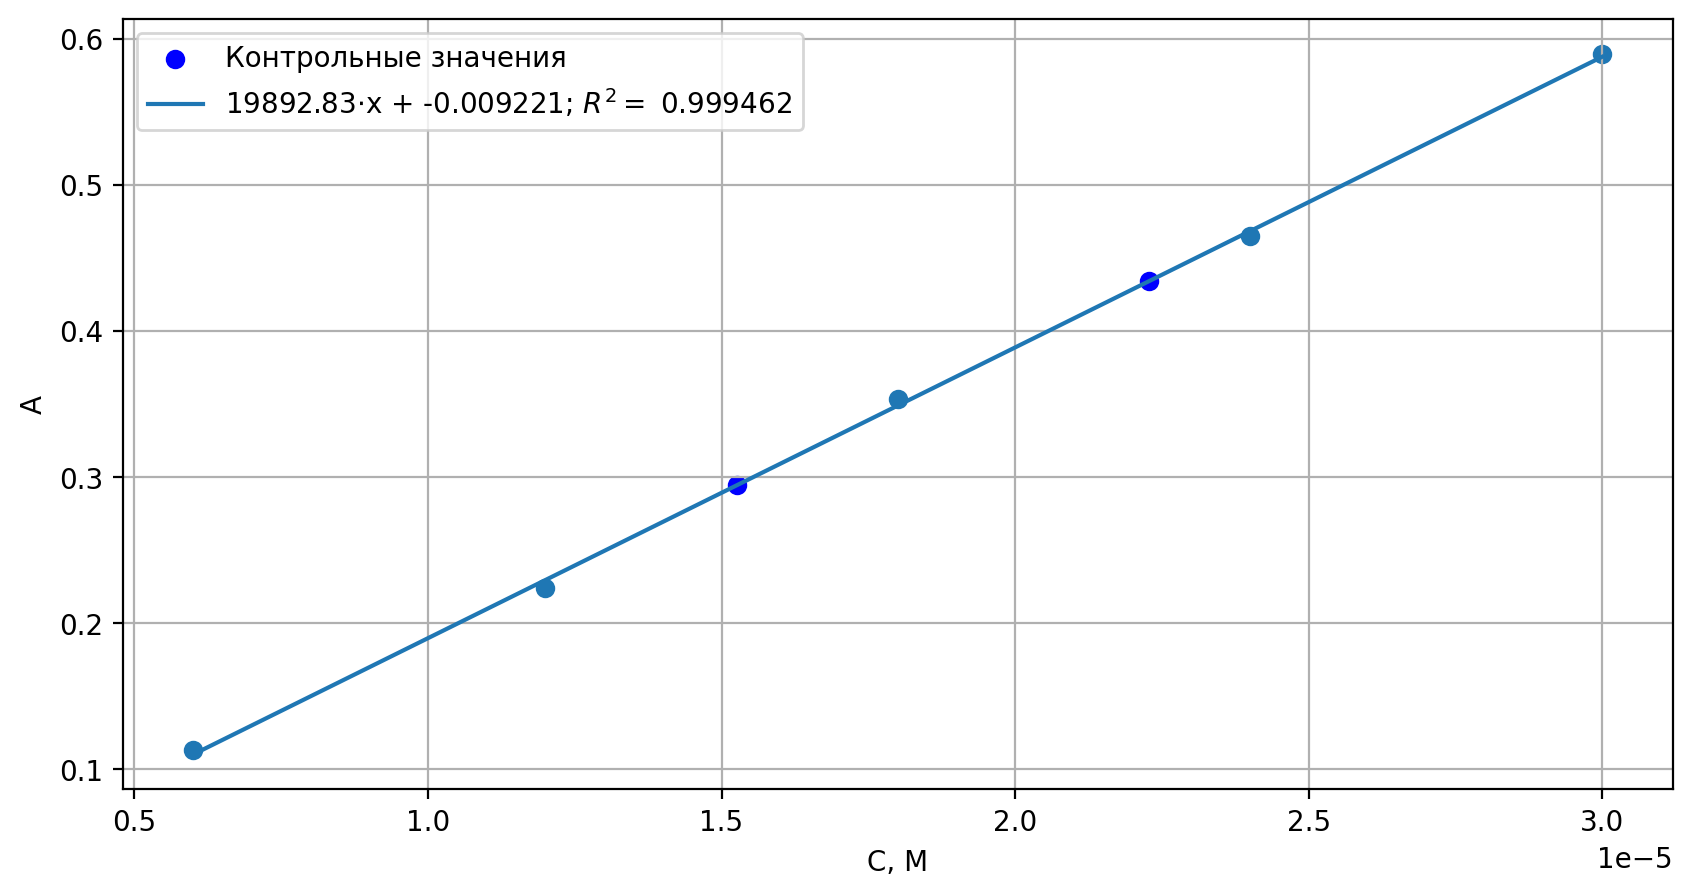

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.optimize import curve_fit


df = pd.DataFrame({})

df['C'] = [6e-6, 1.2e-5, 1.8e-5, 2.4e-5, 3e-5]
df['A'] = [0.11285,0.22382,0.35364,0.46479, 0.58915]

display(df)

popt, pcov = curve_fit(lambda x, k, b: k*x + b, df.C, df.A)
y_pred = popt[0]*df.C + popt[1]
ss_res = np.sum((df.A - y_pred) ** 2)  # Сумма квадратов остатков
ss_tot = np.sum((df.A - np.mean(df.A)) ** 2)  # Общая сумма квадратов
r_squared = 1 - (ss_res / ss_tot)  # Коэффициент детерминации

A_contr = [0.43406, 0.29448]

ax = plt.figure(figsize=(10,5), dpi=200)
plt.scatter(df.C, df.A)

xc = []; yc = []
for y in A_contr:
    x = (y-popt[1])/popt[0]
    xc.append(x)
    yc.append(y)
    print(x)
plt.scatter(xc,yc, color = "b", 
           label = "Контрольные значения")
    
x = np.linspace(6e-6, 3e-5, 10)
plt.plot(x,popt[0]*x + popt[1], 
        label= f"{popt[0]:.2f}$\\cdot$x + {popt[1]:5f}; $R^2 =$ {r_squared:4f}")
plt.legend()
plt.xlabel("C, М")
plt.ylabel("A")
plt.grid()


tikz_convert(ax,
             clean = False, mktex = True, path = "", 
             filename = "градуировка метилоранж.tex", 
             caption = None)

from tabulate import tabulate
print(tabulate(df, 
              tablefmt = "github",
              headers=["C, М", "A"]))

In [8]:

y_pred = popt[0]*df.C + popt[1]
ss_res = np.sum((df.A - y_pred) ** 2)  # Сумма квадратов остатков
ss_tot = np.sum((df.A - np.mean(df.A)) ** 2)  # Общая сумма квадратов
r_squared = 1 - (ss_res / ss_tot)  # Коэффициент детерминации

print(popt[0], popt[1], r_squared)

19892.833335445026 -0.00922100003811304 0.9994620079193606
